# Descubriendo Planetas
## Por Renzo Norero Allimant

## Carga de librerias y analisis inicial

In [184]:
# Primero importemos las librerias que ocuparemos inicialmente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Para ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

In [185]:
# Ahora carguemos el archivo csv y veamos de qué trata, superficialmente

df = pd.read_csv('exoplanetas.csv')
df.head()

,Unnamed: 0,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [186]:
df.tail()

,Unnamed: 0,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6986,6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
6990,6990,FALSE POSITIVE,0,0,1,1,4.856035,6.360000e-05,-6.360000e-05,135.993300,...,-225,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6991 non-null   int64  
 1   koi_disposition    6991 non-null   object 
 2   koi_fpflag_nt      6991 non-null   int64  
 3   koi_fpflag_ss      6991 non-null   int64  
 4   koi_fpflag_co      6991 non-null   int64  
 5   koi_fpflag_ec      6991 non-null   int64  
 6   koi_period         6991 non-null   float64
 7   koi_period_err1    6991 non-null   float64
 8   koi_period_err2    6991 non-null   float64
 9   koi_time0bk        6991 non-null   float64
 10  koi_time0bk_err1   6991 non-null   float64
 11  koi_time0bk_err2   6991 non-null   float64
 12  koi_impact         6991 non-null   float64
 13  koi_impact_err1    6991 non-null   float64
 14  koi_impact_err2    6991 non-null   float64
 15  koi_duration       6991 non-null   float64
 16  koi_duration_err1  6991 

**Observaciones:**

* El dataset cuenta con 6990 filas y 42 columnas.
* No hay valores faltantes.
* Todos los valores corresponden a valores numéricos, ya sea del tipo integer o float.
* Se identifica la columna "koi_position" como la variable objetivo.


* Por otro lado, podemos identificar que la columna "Unnamed" es un índice, por lo que la convierte en una columna que no aporta valor predictivo al análisis. Por ello es que será removida.

In [188]:
df = df.drop(['Unnamed: 0'], axis=1)

## Análisis exploratorio

In [189]:
# Identifiquemos un resumen de las métricas estadísticas básicas de las variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
koi_fpflag_nt,6991.0,0.157059,0.363882,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ss,6991.0,0.244743,0.429966,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_co,6991.0,0.202975,0.402243,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_fpflag_ec,6991.0,0.125018,0.330763,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
koi_period,6991.0,56.191248,117.570962,2.598197e-01,2.620126,8.947426,34.282605,1.071233e+03
koi_period_err1,6991.0,0.001851,0.007185,1.100000e-08,0.000005,0.000033,0.000240,1.568000e-01
koi_period_err2,6991.0,-0.001851,0.007185,-1.568000e-01,-0.000240,-0.000033,-0.000005,-1.100000e-08
koi_time0bk,6991.0,164.488820,67.020475,1.205159e+02,132.683917,136.739230,169.937005,1.472522e+03
koi_time0bk_err1,6991.0,0.009340,0.021989,8.700000e-06,0.001145,0.003990,0.010000,5.690000e-01
koi_time0bk_err2,6991.0,-0.009340,0.021989,-5.690000e-01,-0.010000,-0.003990,-0.001145,-8.700000e-06


## Identificando variables cuyo promedio sea muy distinto para cada caso

In [190]:
# Definimos dos DataFrames. Uno con los valores CONFIRMED y otro FALSE POSITIVE de nuestra variable objetivo
df_confirmados = df[df['koi_disposition'] == 'CONFIRMED'].drop(['koi_disposition'], axis=1)
df_falsos_positivos = df[df['koi_disposition'] == 'FALSE POSITIVE'].drop(['koi_disposition'], axis=1)

In [191]:
# Luego calculamos los valores promedios de cada columna en cada dataframe
prom_confirmados = pd.DataFrame({'PROM_CONFIRMADOS': df_confirmados.mean()})
prom_falsos_positivos = pd.DataFrame({'PROM_FALSOS_POSITIVOS': df_falsos_positivos.mean()})

In [192]:
# Ahora hacemos un DataFrame con ambas columnas para poder comparar con facilidad
prom_comparado = pd.DataFrame(prom_confirmados.join(prom_falsos_positivos['PROM_FALSOS_POSITIVOS']))
prom_comparado

,PROM_CONFIRMADOS,PROM_FALSOS_POSITIVOS
koi_fpflag_nt,0.009444,0.308505
koi_fpflag_ss,0.011667,0.476027
koi_fpflag_co,0.003333,0.403253
koi_fpflag_ec,0.000556,0.249144
koi_period,26.451343,66.103066
koi_period_err1,0.000190,0.002556
koi_period_err2,-0.000190,-0.002556
koi_time0bk,156.532602,166.012645
koi_time0bk_err1,0.004084,0.010165
koi_time0bk_err2,-0.004084,-0.010165


In [193]:
# Ahora insertaremos una columna que sea el resultado de la división del valor mayor dividido por el valor menor, para identificar las mayores diferencias
prom_comparado['DIFERENCIA'] = prom_comparado.max(axis=1) / prom_comparado.min(axis=1)
prom_comparado

,PROM_CONFIRMADOS,PROM_FALSOS_POSITIVOS,DIFERENCIA
koi_fpflag_nt,0.009444,0.308505,32.665189
koi_fpflag_ss,0.011667,0.476027,40.802348
koi_fpflag_co,0.003333,0.403253,120.976027
koi_fpflag_ec,0.000556,0.249144,448.458904
koi_period,26.451343,66.103066,2.499044
koi_period_err1,0.000190,0.002556,13.477526
koi_period_err2,-0.000190,-0.002556,0.074198
koi_time0bk,156.532602,166.012645,1.060563
koi_time0bk_err1,0.004084,0.010165,2.488751
koi_time0bk_err2,-0.004084,-0.010165,0.401808


**Observaciones:**

* Como observación inicial, destacan algunas variables cuyos promedios son ampliamente diferentes entre los casos clasificados como "CONFIRMED" y los clasificados como "FALSE POSITIVE"
* La variable 'koi_fpflag_co' presenta una gran diferencia relativa, siendo 120 veces mayor en el caso de los falsos positivos.
* La variable 'koi_fpflag_ec' es la que presenta una mayor diferencia en terminos relativos, siendo 448 veces mayor en el caso de los falsos positivos.
* La variable 'koi_prad' presenta una diferencia relativa significativa, siendo 81 veces mayor para el caso de los falsos positivos.
* La variable 'koi_prad_err1' presenta una gran diferencia relativa, siendo 76 veces mayor en el caso de los falsos positivos.

## Normalización del dataset

In [194]:
# Para normalizarlo, primero importaremos los modulos necesarios
from sklearn.preprocessing import StandardScaler

# Ahora, separamos el dataset en 2, para dejar solo las variables numericas en uno y en el otro la variable objetivo
var_numericas = df.drop(['koi_disposition'], axis=1)
var_obj = df['koi_disposition']

# Ahora aplicamos el escalado a las variables numéricas
escala = StandardScaler()
df_escalado = pd.DataFrame(escala.fit_transform(var_numericas), columns = var_numericas.columns)

In [195]:
# Veamos como quedó el dataset escalado
df_escalado.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,-0.431651,-0.569257,-0.504645,-0.377995,-0.015080,-0.223166,0.223166,-0.029470,-0.264701,0.264701,...,1.122665,0.368735,-0.432383,0.542544,-0.137854,-0.295260,0.171712,-0.031113,1.200670,0.796245
1,-0.431651,1.756677,-0.504645,-0.377995,-0.308705,-0.255599,0.255599,0.169534,-0.398369,0.398369,...,-0.207059,0.544051,-0.583854,-0.433254,-0.147848,-0.142689,0.162800,1.033563,1.198584,0.862136
2,-0.431651,1.756677,-0.504645,-0.377995,-0.463194,-0.257637,0.257637,0.086827,-0.419563,0.419563,...,-0.179065,0.589588,-0.515692,-0.335674,-0.160893,-0.180832,0.168566,-1.374846,1.240482,0.981333
3,-0.431651,-0.569257,-0.504645,-0.377995,-0.456486,-0.257150,0.257150,0.106046,-0.373400,0.373400,...,-0.696958,0.302707,-0.386942,-0.847968,-0.117694,-0.022302,0.133969,-0.698683,1.224118,0.916182
4,-0.431651,-0.569257,-0.504645,-0.377995,-0.442801,-0.256212,0.256212,0.126695,-0.338380,0.338380,...,-0.990897,0.411995,-0.508118,-1.079720,-0.130230,-0.044949,0.148647,0.882659,1.223693,1.067955


## Reducción de dimensionalidad mediante método de PCA

In [196]:
# Importamos el módulo a utilizar
from sklearn.decomposition import PCA

# Declaramos una instancia del modelo, que en este caso ocupe 20 componentes para explicar la varianza, ya que queremos reducir a la mitad las variables
pca = PCA(n_components=20)

In [197]:
# Ejecutamos el metodo
pca.fit(df_escalado)

PCA(n_components=20)

In [198]:
# Veamos qué tanto del valor de la varianza explican ahora los 20 componentes
varianza = pca.explained_variance_ratio_
sum(list(varianza))

0.8983915568957934

In [199]:
df_pca = pd.DataFrame(pca.fit_transform(df_escalado))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.704747,-1.017367,0.309499,2.195659,0.374530,-0.302161,0.063546,0.285608,0.520438,0.208625,-0.014830,0.506035,-0.997935,-0.345502,0.446739,-0.199486,-0.373009,0.145688,0.193284,-0.010931
1,-1.088252,-0.663318,0.210327,-0.562925,0.234525,0.273305,1.328049,0.028082,0.005200,1.183223,-0.004804,0.392353,-1.102581,-0.515475,-0.566910,0.326069,0.133618,0.382902,0.071307,-0.229965
2,-1.346522,-0.516375,0.233866,-0.402727,0.394087,-0.026766,1.280107,-0.281114,0.493409,0.863980,-0.685071,-0.004070,-0.454401,1.331450,0.372315,0.522206,-0.177610,0.163068,-0.137837,0.100709
3,-0.827485,-0.373820,0.124532,-0.385313,-0.269648,0.190996,0.842805,1.178167,1.089305,0.848517,-0.751254,0.360481,-0.415859,0.882491,-0.096240,0.259143,0.118859,-0.099475,0.088210,0.081514
4,-0.595490,-0.473804,0.104401,-0.693367,-0.429396,0.366189,0.895982,1.398041,1.358333,0.961333,-0.174122,1.159947,-0.800333,-0.917135,0.425132,0.132585,-0.319459,0.164633,0.175762,0.088522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.133077,0.034264,-0.140756,-0.577703,-1.247814,1.044684,-0.667653,-0.195540,-0.089824,0.035785,-0.538819,0.515203,-1.369203,-0.271986,-0.681672,-0.813071,-0.692063,-0.092160,0.373727,0.143409
6987,-1.591711,0.179258,0.125053,-0.971498,-0.638165,0.829331,0.376686,-0.592818,-0.680307,0.172210,-0.565711,-0.272052,-1.241749,-0.726635,-0.196491,0.638829,-0.052543,0.194319,0.520114,-0.389612
6988,-0.575427,-0.234596,-0.211902,-0.507489,-0.455550,0.156920,0.372363,0.822014,1.467529,0.567946,-0.662570,0.247982,-0.094073,1.319792,-0.039526,0.385685,0.145613,0.064837,0.082097,-0.303596
6989,-0.996735,0.155918,-0.195437,-1.396795,-1.410349,1.442718,0.460342,0.892928,0.448481,0.525941,-0.890548,0.235975,-0.626035,-0.156935,-0.117305,0.707106,0.128092,-0.225973,0.072768,-0.153652


In [200]:
# Aprovechamos de renombrar las columnas, para que se entienda que corresponden a cada componente principal obtenido anteriormente
for i in range (0,20):
    df_pca.rename(columns = {i:'PC ' + str(i+1)}, inplace = True)

df_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20
0,-0.704747,-1.017367,0.309499,2.195659,0.374530,-0.302161,0.063546,0.285608,0.520438,0.208625,-0.014830,0.506035,-0.997935,-0.345502,0.446739,-0.199486,-0.373009,0.145688,0.193284,-0.010931
1,-1.088252,-0.663318,0.210327,-0.562925,0.234525,0.273305,1.328049,0.028082,0.005200,1.183223,-0.004804,0.392353,-1.102581,-0.515475,-0.566910,0.326069,0.133618,0.382902,0.071307,-0.229965
2,-1.346522,-0.516375,0.233866,-0.402727,0.394087,-0.026766,1.280107,-0.281114,0.493409,0.863980,-0.685071,-0.004070,-0.454401,1.331450,0.372315,0.522206,-0.177610,0.163068,-0.137837,0.100709
3,-0.827485,-0.373820,0.124532,-0.385313,-0.269648,0.190996,0.842805,1.178167,1.089305,0.848517,-0.751254,0.360481,-0.415859,0.882491,-0.096240,0.259143,0.118859,-0.099475,0.088210,0.081514
4,-0.595490,-0.473804,0.104401,-0.693367,-0.429396,0.366189,0.895982,1.398041,1.358333,0.961333,-0.174122,1.159947,-0.800333,-0.917135,0.425132,0.132585,-0.319459,0.164633,0.175762,0.088522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.133077,0.034264,-0.140756,-0.577703,-1.247814,1.044684,-0.667653,-0.195540,-0.089824,0.035785,-0.538819,0.515203,-1.369203,-0.271986,-0.681672,-0.813071,-0.692063,-0.092160,0.373727,0.143409
6987,-1.591711,0.179258,0.125053,-0.971498,-0.638165,0.829331,0.376686,-0.592818,-0.680307,0.172210,-0.565711,-0.272052,-1.241749,-0.726635,-0.196491,0.638829,-0.052543,0.194319,0.520114,-0.389612
6988,-0.575427,-0.234596,-0.211902,-0.507489,-0.455550,0.156920,0.372363,0.822014,1.467529,0.567946,-0.662570,0.247982,-0.094073,1.319792,-0.039526,0.385685,0.145613,0.064837,0.082097,-0.303596
6989,-0.996735,0.155918,-0.195437,-1.396795,-1.410349,1.442718,0.460342,0.892928,0.448481,0.525941,-0.890548,0.235975,-0.626035,-0.156935,-0.117305,0.707106,0.128092,-0.225973,0.072768,-0.153652


**Observaciones:**

* Vemos que se han reducido las variables de 40 a 20, que era el objetivo del método PCA
* Estas 20 nuevas variables logran explicar el ~89% de la varianza, por lo que es un trade off que considero positivo, pues el modelo ahora ha reducido su dimensionalidad a la mitad, logrando aún explicar gran parte de la varianza.

## Entrenamiento y optimización del modelo

In [201]:
# Importamos el modulo necesario para separar el dataset en training y test
from sklearn.model_selection import train_test_split

# Ahora definimos las variables X e y de acuerdo a los dataset que tenemos, uno con las nuevas variables y otro con la variable objetivo
X = df_pca
y = var_obj

# Realizamos la separación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Verifiquemos la forma de los dataset creados
print(X_train.shape, X_test.shape)

(5592, 20) (1399, 20)


In [202]:
# Importamos los módulos necesarios para implementar el modelo y medir su rendimiento
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ahora implementamos el modelo
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Veamos el comportamiento del modelo en cuanto a precisión
print('Exactitud del modelo con dataset de entrenamiento: ')
print(accuracy_score(y_train, y_pred_train))
print()
print('Exactitud del modelo con dataset de prueba: ')
print(accuracy_score(y_test, y_pred_test))

Exactitud del modelo con dataset de entrenamiento: 
0.8851931330472103

Exactitud del modelo con dataset de prueba: 
0.821300929235168


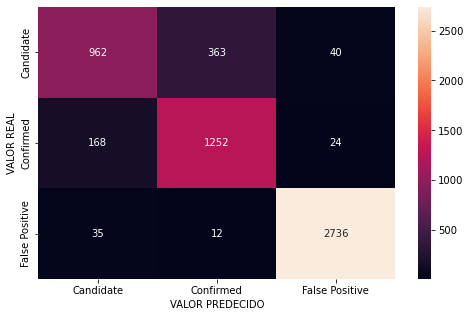

In [203]:
# Veamos la matriz de confusión del modelo. Para ello, primero importamos el módulo necesario
from sklearn.metrics import confusion_matrix

# Ahora armemos la matriz con los valores reales y los valores predecidos por el modelo con el dataset de entrenamiento
cm = confusion_matrix(y_train, y_pred_train) 
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Candidate', 'Confirmed', 'False Positive'], yticklabels = ['Candidate', 'Confirmed'
                                                                                                                       , 'False Positive'])
plt.ylabel('VALOR REAL')
plt.xlabel('VALOR PREDECIDO')
plt.show()

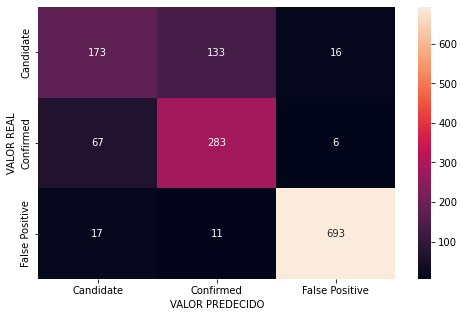

In [204]:
# Ahora veamos con el dataset de prueba
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Candidate', 'Confirmed', 'False Positive'], yticklabels = ['Candidate', 'Confirmed'
                                                                                                                       , 'False Positive'])
plt.ylabel('VALOR REAL')
plt.xlabel('VALOR PREDECIDO')
plt.show()

## Afinación de hiperparámetros
#### En primera instancia definimos en 5 el número de vecinos del modelo, pero esta decisión fue de manera aleatoria. Esta vez haremos correr un loop que se quedará con el número de vecinos que arroje la precisión promedio más alta en el dataset de prueba

In [205]:
# Primero definimos las variables que almacenarán los valores
n_vecinos = []
exactitud_entrenamiento = []
exactitud_prueba = []

# Ahora hacemos correr el loop con límite de 30 vecinos
for n in range (1,31):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    # En este paso vamos agregando los valores a cada lista respectiva, para luego formar un dataframe que nos permita visualizar los resultados
    n_vecinos.append(n)
    exactitud_entrenamiento.append(accuracy_score(y_train, y_pred_train))
    exactitud_prueba.append(accuracy_score(y_test, y_pred_test))

In [206]:
# Ahora creamos un nuevo DataFrame con la información que acabamos de generar
zipped = list(zip(n_vecinos, exactitud_entrenamiento, exactitud_prueba))
metricas = pd.DataFrame(zipped, columns=['n_vecinos', 'exac_entrenamiento', 'exac_prueba'])
metricas

,n_vecinos,exac_entrenamiento,exac_prueba
0,1,1.000000,0.791279
1,2,0.905758,0.774124
2,3,0.906474,0.818442
3,4,0.889485,0.809149
4,5,0.885193,0.821301
5,6,0.877325,0.819871
6,7,0.874106,0.819157
7,8,0.869814,0.827019
8,9,0.864628,0.827019
9,10,0.866059,0.830593


In [209]:
# Busquemos el valor más grande para la columna que indica la precisión con el dataset de prueba
metricas['exac_prueba'].max()

0.8305932809149392

**Observaciones**
* Podemos ver entonces que el parámetro óptimo según nuestro análisis es el de 17 vecinos.
* A continuación entrenaremos nuevamente el modelo, esta vez con ese parámetro, y veremos cómo mejora y cómo cambia la matriz de confusión.

In [210]:
# Ahora implementamos el modelo con el valor ajustado
knn_ajustado = KNeighborsClassifier(n_neighbors = 17)
knn_ajustado.fit(X_train, y_train)
y_pred_train = knn_ajustado.predict(X_train)
y_pred_test = knn_ajustado.predict(X_test)

# Veamos el comportamiento del modelo en cuanto a precisión
print('Exactitud del modelo ajustado con dataset de entrenamiento: ')
print(accuracy_score(y_train, y_pred_train))
print()
print('Exactitud del modelo ajustado con dataset de prueba: ')
print(accuracy_score(y_test, y_pred_test))

Exactitud del modelo ajustado con dataset de entrenamiento: 
0.8506795422031473

Exactitud del modelo ajustado con dataset de prueba: 
0.827734095782702


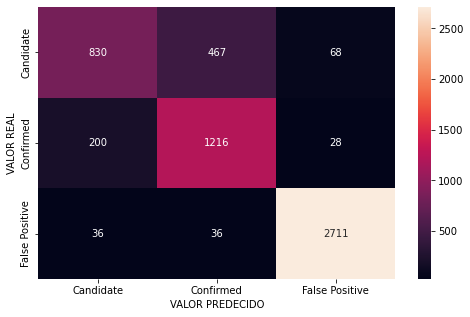

In [211]:
# Veamos la matriz de confusión del modelo ajustado. Para ello, primero importamos el módulo necesario
cm = confusion_matrix(y_train, y_pred_train) 
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Candidate', 'Confirmed', 'False Positive'], yticklabels = ['Candidate', 'Confirmed'
                                                                                                                       , 'False Positive'])
plt.ylabel('VALOR REAL')
plt.xlabel('VALOR PREDECIDO')
plt.show()

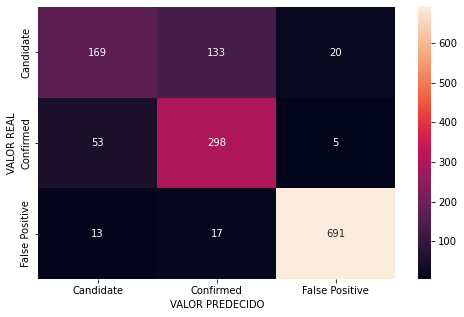

In [212]:
# Ahora veamos con el dataset de prueba
cm = confusion_matrix(y_test, y_pred_test) 
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Candidate', 'Confirmed', 'False Positive'], yticklabels = ['Candidate', 'Confirmed'
                                                                                                                       , 'False Positive'])
plt.ylabel('VALOR REAL')
plt.xlabel('VALOR PREDECIDO')
plt.show()

**Observaciones**
* Podemos ver como con el nuevo parámetro, si bien el modelo empeoró en el dataset de entrenamiento, en el dataset de prueba mejoró su precisión.
* En la matriz de confusión podemos ver que un porcentaje importante de las predicciones que el modelo realiza como planetas confirmados, corresponden en realidad a planetas candidatos. Esto causa que el rendimiento del modelo se vea ampliamente afectado de manera negativa, ya que finalmente, casi la mitad de los planetas realmente candidatos son considerados como confirmados por nuestro algoritmo. Si consideramos la definición de planeta candidato del dataset, que se refiere a aquellos planetas que han pasado todas las pruebas y cumplen con todos los parámetros HASTA EL MOMENTO, y podrían eventualmente ser descartados por algunas pruebas restantes, podríamos inferir que el modelo identifica aquellos parámetros ya aprobados y con ellos clasifica al planeta de "confirmado", restándole importancia a los parámetros asociados a las pruebas faltantes para determinar si se trata de un planeta o no.
* Por otro lado, los planetas FALSOS POSITIVOS son en su mayoría clasificados de manera correcta por ambos modelos y tanto en entrenamiento como en prueba, presentando muy pocos errores en todos los casos.

## Aspectos a mejorar del modelo:

**Trabajar en la distribucion de las variables:**
Al hacer un análisis superficial de las variables, se puede identificar que no presentan distribuciones normales, lo que podría causar que el modelo se comporte de tal manera de afectar negativamente su rendimiento. Por lo tanto, una forma de mejorar el modelo sería trabajar en la normalización de las distribuciones, ya sea a través de transformaciones logarítmicas u otras, con el propósito de que se acerquen a la distribución gaussiana y de esa forma se pueda trabajar mejor el modelo predictivo.

**Ajuste de parámetros:**
La elección inicial del parámetro n_neighbours, que indica el número de "vecinos" que se buscan para clasificar una observación en una u otra categoría, fue completamente aleatoria. Ahora bien, la elección del rango de 1 a 30 en que se correría el loop para elegir el nuevo parámetro óptimo, así como la decisión de elegir el "n" que diera un mayor valor de precisión en el dataset de prueba, fueron también algo aleatorias, por lo que podrían existir otras elecciones justificadas en métodos matemáticos que deriven en resultados distintos de "n", que permitan un mejor rendimiento del modelo.

 **Utilizar otras métricas:**
 Para el caso estudiado, se utilizó la métrica de exactitud, que corresponde a la razón entre las predicciones correctas (verdaderos positivos y verdaderos falsos) sobre el total de predicciones realizadas. Podrían utilizarse otras métricas, como la precisión, el puntaje f1 u otras, que eventualmente podrían derivar en resultados distintos, ya sean mejores o peores. Se debe tener en cuenta qué es lo más importante para elegir la métrica adecuada. Con esto quiero decir que se debe evaluar si, por ejemplo, es más importante no dejar pasar ningún planeta que sea un confirmado, a sabiendas que eso podría implicar clasificar como confirmado cuerpos celestes que realmente no lo son. O por otro lado, quizás podría ser más importante tener certeza de que los clasificados como planetas realmente lo son, lo que podría significar que algunos cuerpos que son planetas sean clasificados de otra forma.
 
 **Identificación de planetas candidatos como confirmados**
 Como se mencionó en etapas anteriores del programa, en la matriz de confusión podemos ver que un porcentaje importante de las predicciones que el modelo realiza como planetas confirmados, corresponden en realidad a planetas candidatos. Esto causa que el rendimiento del modelo se vea ampliamente afectado de manera negativa, ya que finalmente, casi la mitad de los planetas realmente candidatos son considerados como confirmados por nuestro algoritmo. Esto eventualmente podría ser corregido si se hace un trabajo de análisis más profundo y un algoritmo más complejo que logre identificar en detalle qué hace que un planeta candidato se convierta en uno confirmado.